# Neural Networks - Algorithms and Math!



## Single-Layer neural network, one output

Recall what a single neuron is doing, mathematically.  It receives a collection
of inputs, let's assume they're in a vector $\boldsymbol{x}$.  

Each neuron also has a weight vector $\boldsymbol{w}$.  These two vectors
are the same length.

Each neuron also has a bias parameter $b$.  (In linear regression and logistic regression, we incorporated $b$ into the weight vector.  For reasons that will be clear later, we are undoing this and keeping $\boldsymbol w$ and $b$ separate.)

Each neuron computes the dot product $z =\boldsymbol{w} \cdot \boldsymbol{x} + b$.
(We used that $z$ notation in logistic regression as well!). 

Each neuron takes this dot product and then passes it through the **activation function**,  $g(z)$.  This function might be different for different applications.
Common choices are:

- the identity function, $g(z) = z$
- the sigmoid function, $g(z) = \dfrac{1}{1+e^{-z}}$
- the ReLU function, $g(z) = \max(0, z)$

So the complete computation is $a = g(z) = g(\boldsymbol{w} \cdot \boldsymbol{x})$.
This is a single number (a scalar).





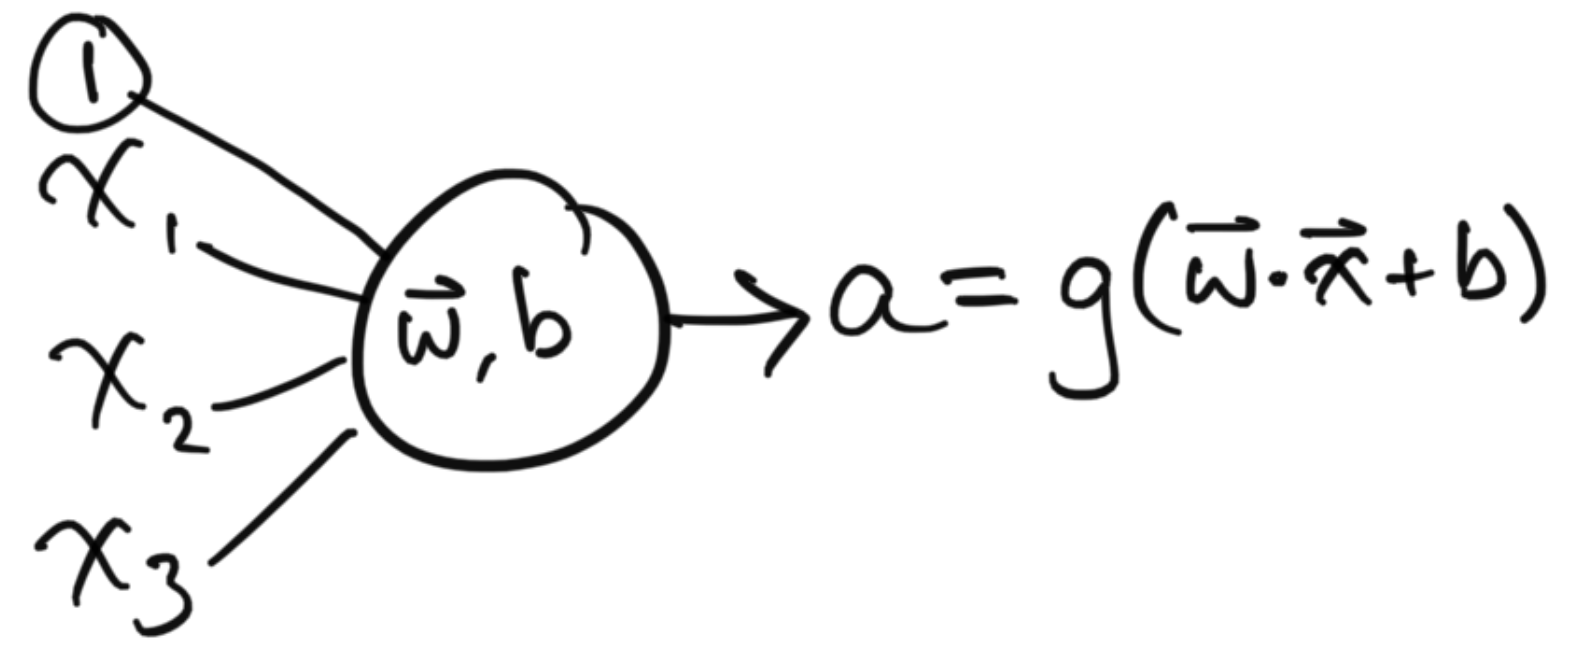

Notice how depending on what $g$ is, this network can represent either the same function (model) as linear regression does, or as logistic regression does.

A neural network can have more than one output:


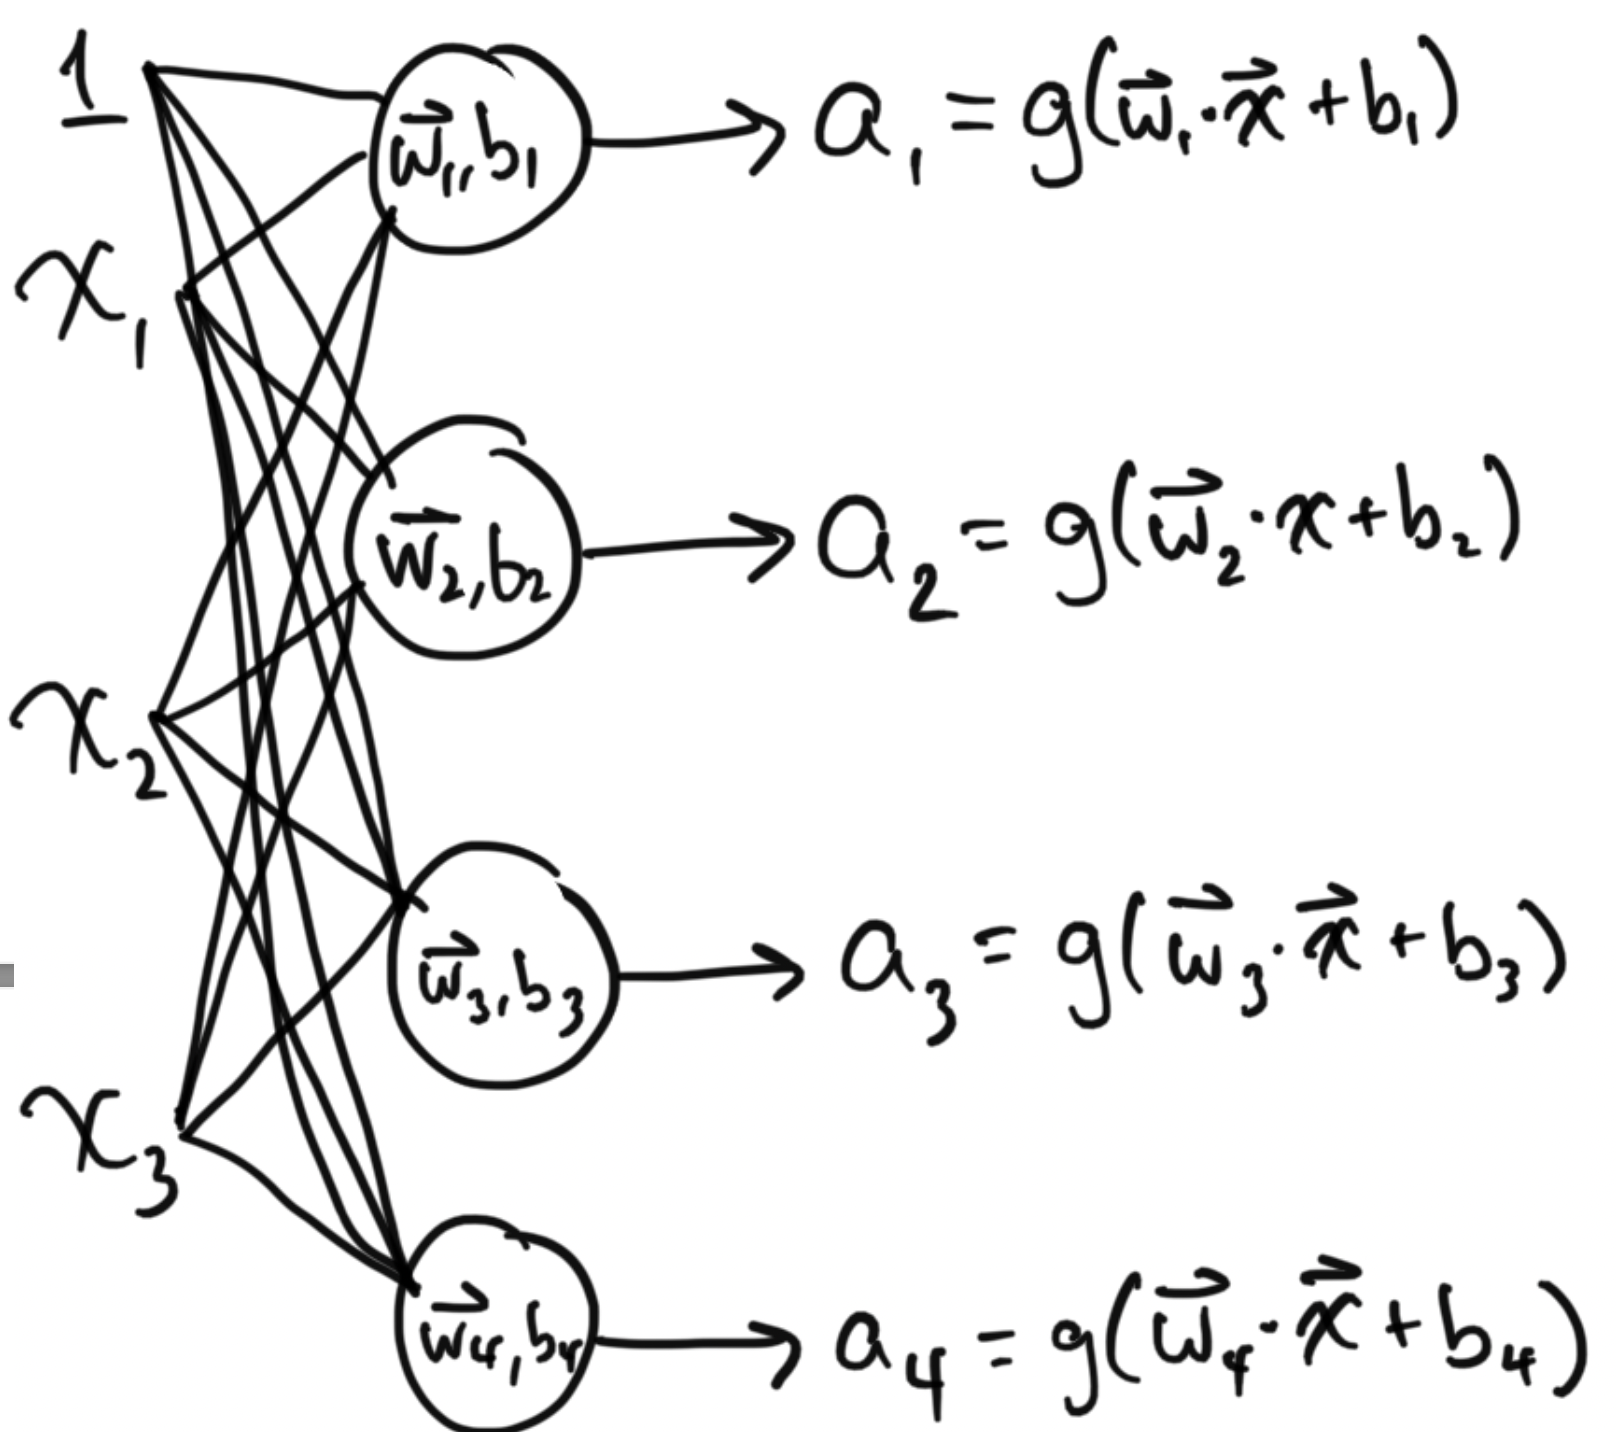

We can simplify this notation a bit:

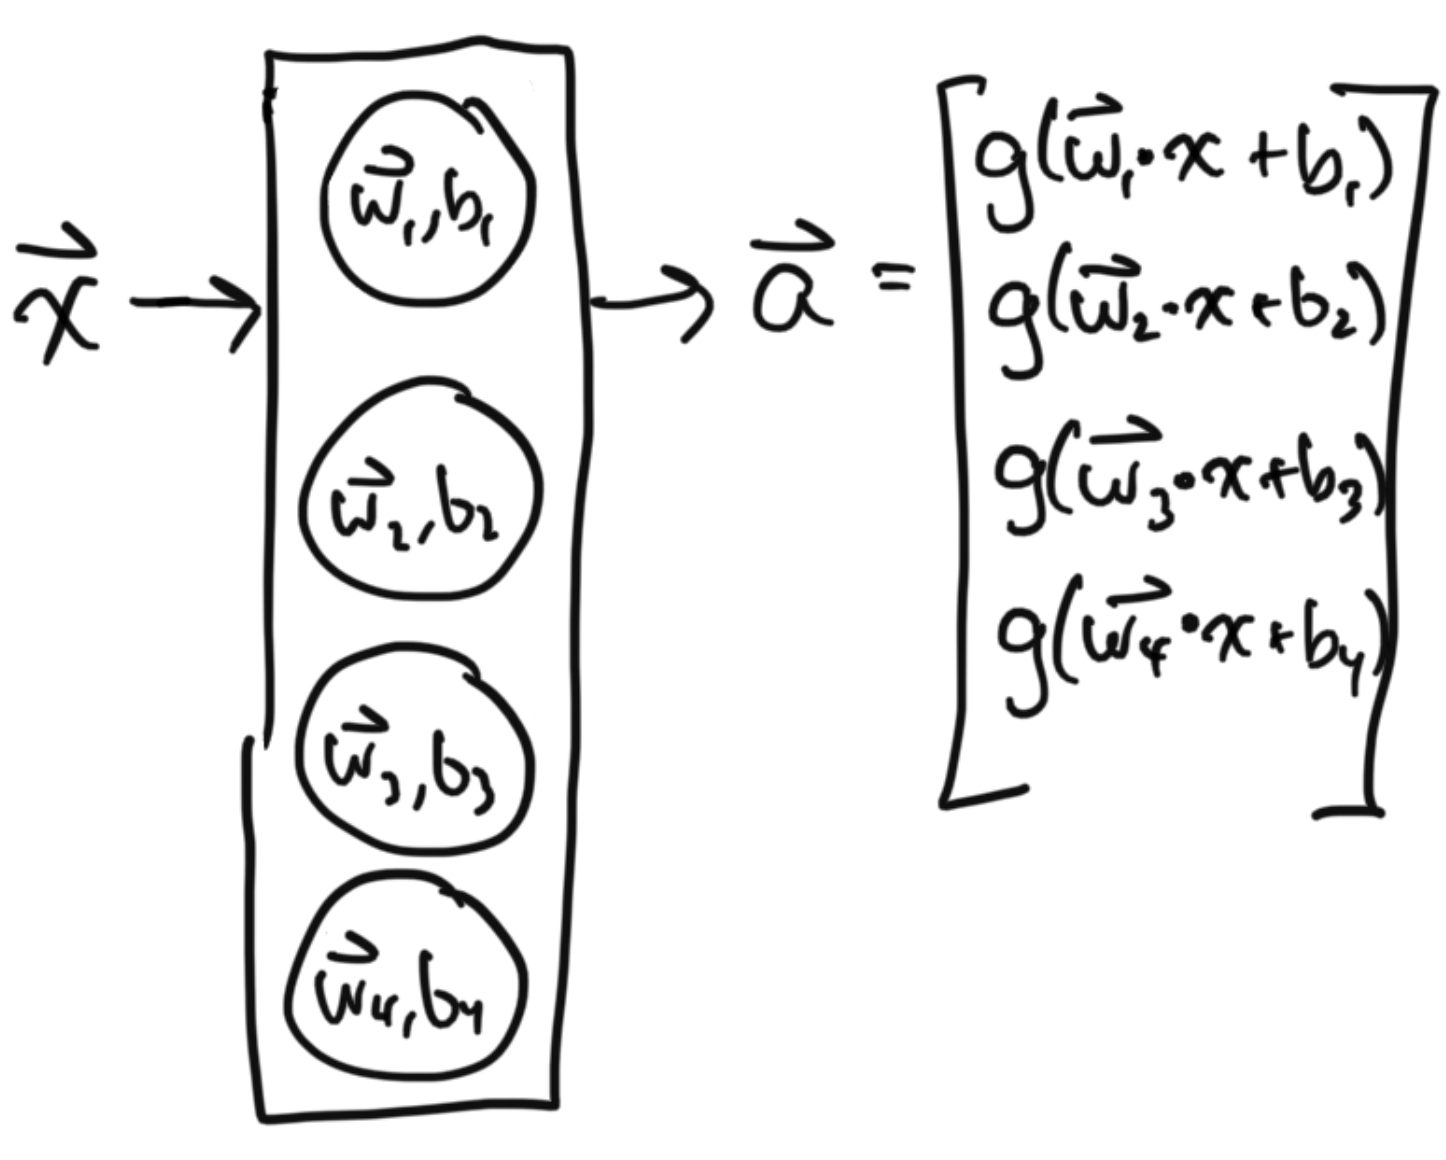

## Vectorization

We can write this all much more nicely with vectors:
    
Let's put all of the $w$ vectors into one matrix (like we did for logistic regression):

$$\begin{bmatrix}
\uparrow & \uparrow & \uparrow  \\
\boldsymbol{w_1} & \boldsymbol{w_2} & \ldots  \\
\downarrow & \downarrow & \downarrow  \\
\end{bmatrix}$$

And let's make a $\boldsymbol b$ vector:

$$\boldsymbol b = [b_1, b_2, \ldots]$$

Then we can calculate the $a$ vector as:

$$\boldsymbol z = \boldsymbol x \boldsymbol W + \boldsymbol b$$

$$\boldsymbol a = g(\boldsymbol z) = g(\boldsymbol x \boldsymbol W + \boldsymbol b)$$

We can take this one step further:

Define a matrix $\boldsymbol X$ like we have before.

Define $\boldsymbol Z=\boldsymbol X \boldsymbol W + \boldsymbol b$

Define $\boldsymbol A = g(\boldsymbol Z)$ (apply the activation function across
each row of $\boldsymbol Z$)

That's a single layer neural network!

## Multi-layer networks

By convention, we call the input layer "layer 0" and each subsequent layer
gets one higher number (layer 1, layer 2, etc).

We will use a superscript number in square brackets to denote the variables
at each layer.

So the first layer that does any computation is layer 1 (layer 0 is just the input features), so the weight vectors at this layer are now
$\boldsymbol{w}_1^{[1]}, \boldsymbol{w}_2^{[1]}$, etc.  And the activation
values are combined into vector $\boldsymbol{a^{[1]}}.$

To make this even more complicated, now the output of
layer one becomes the input to layer 2.

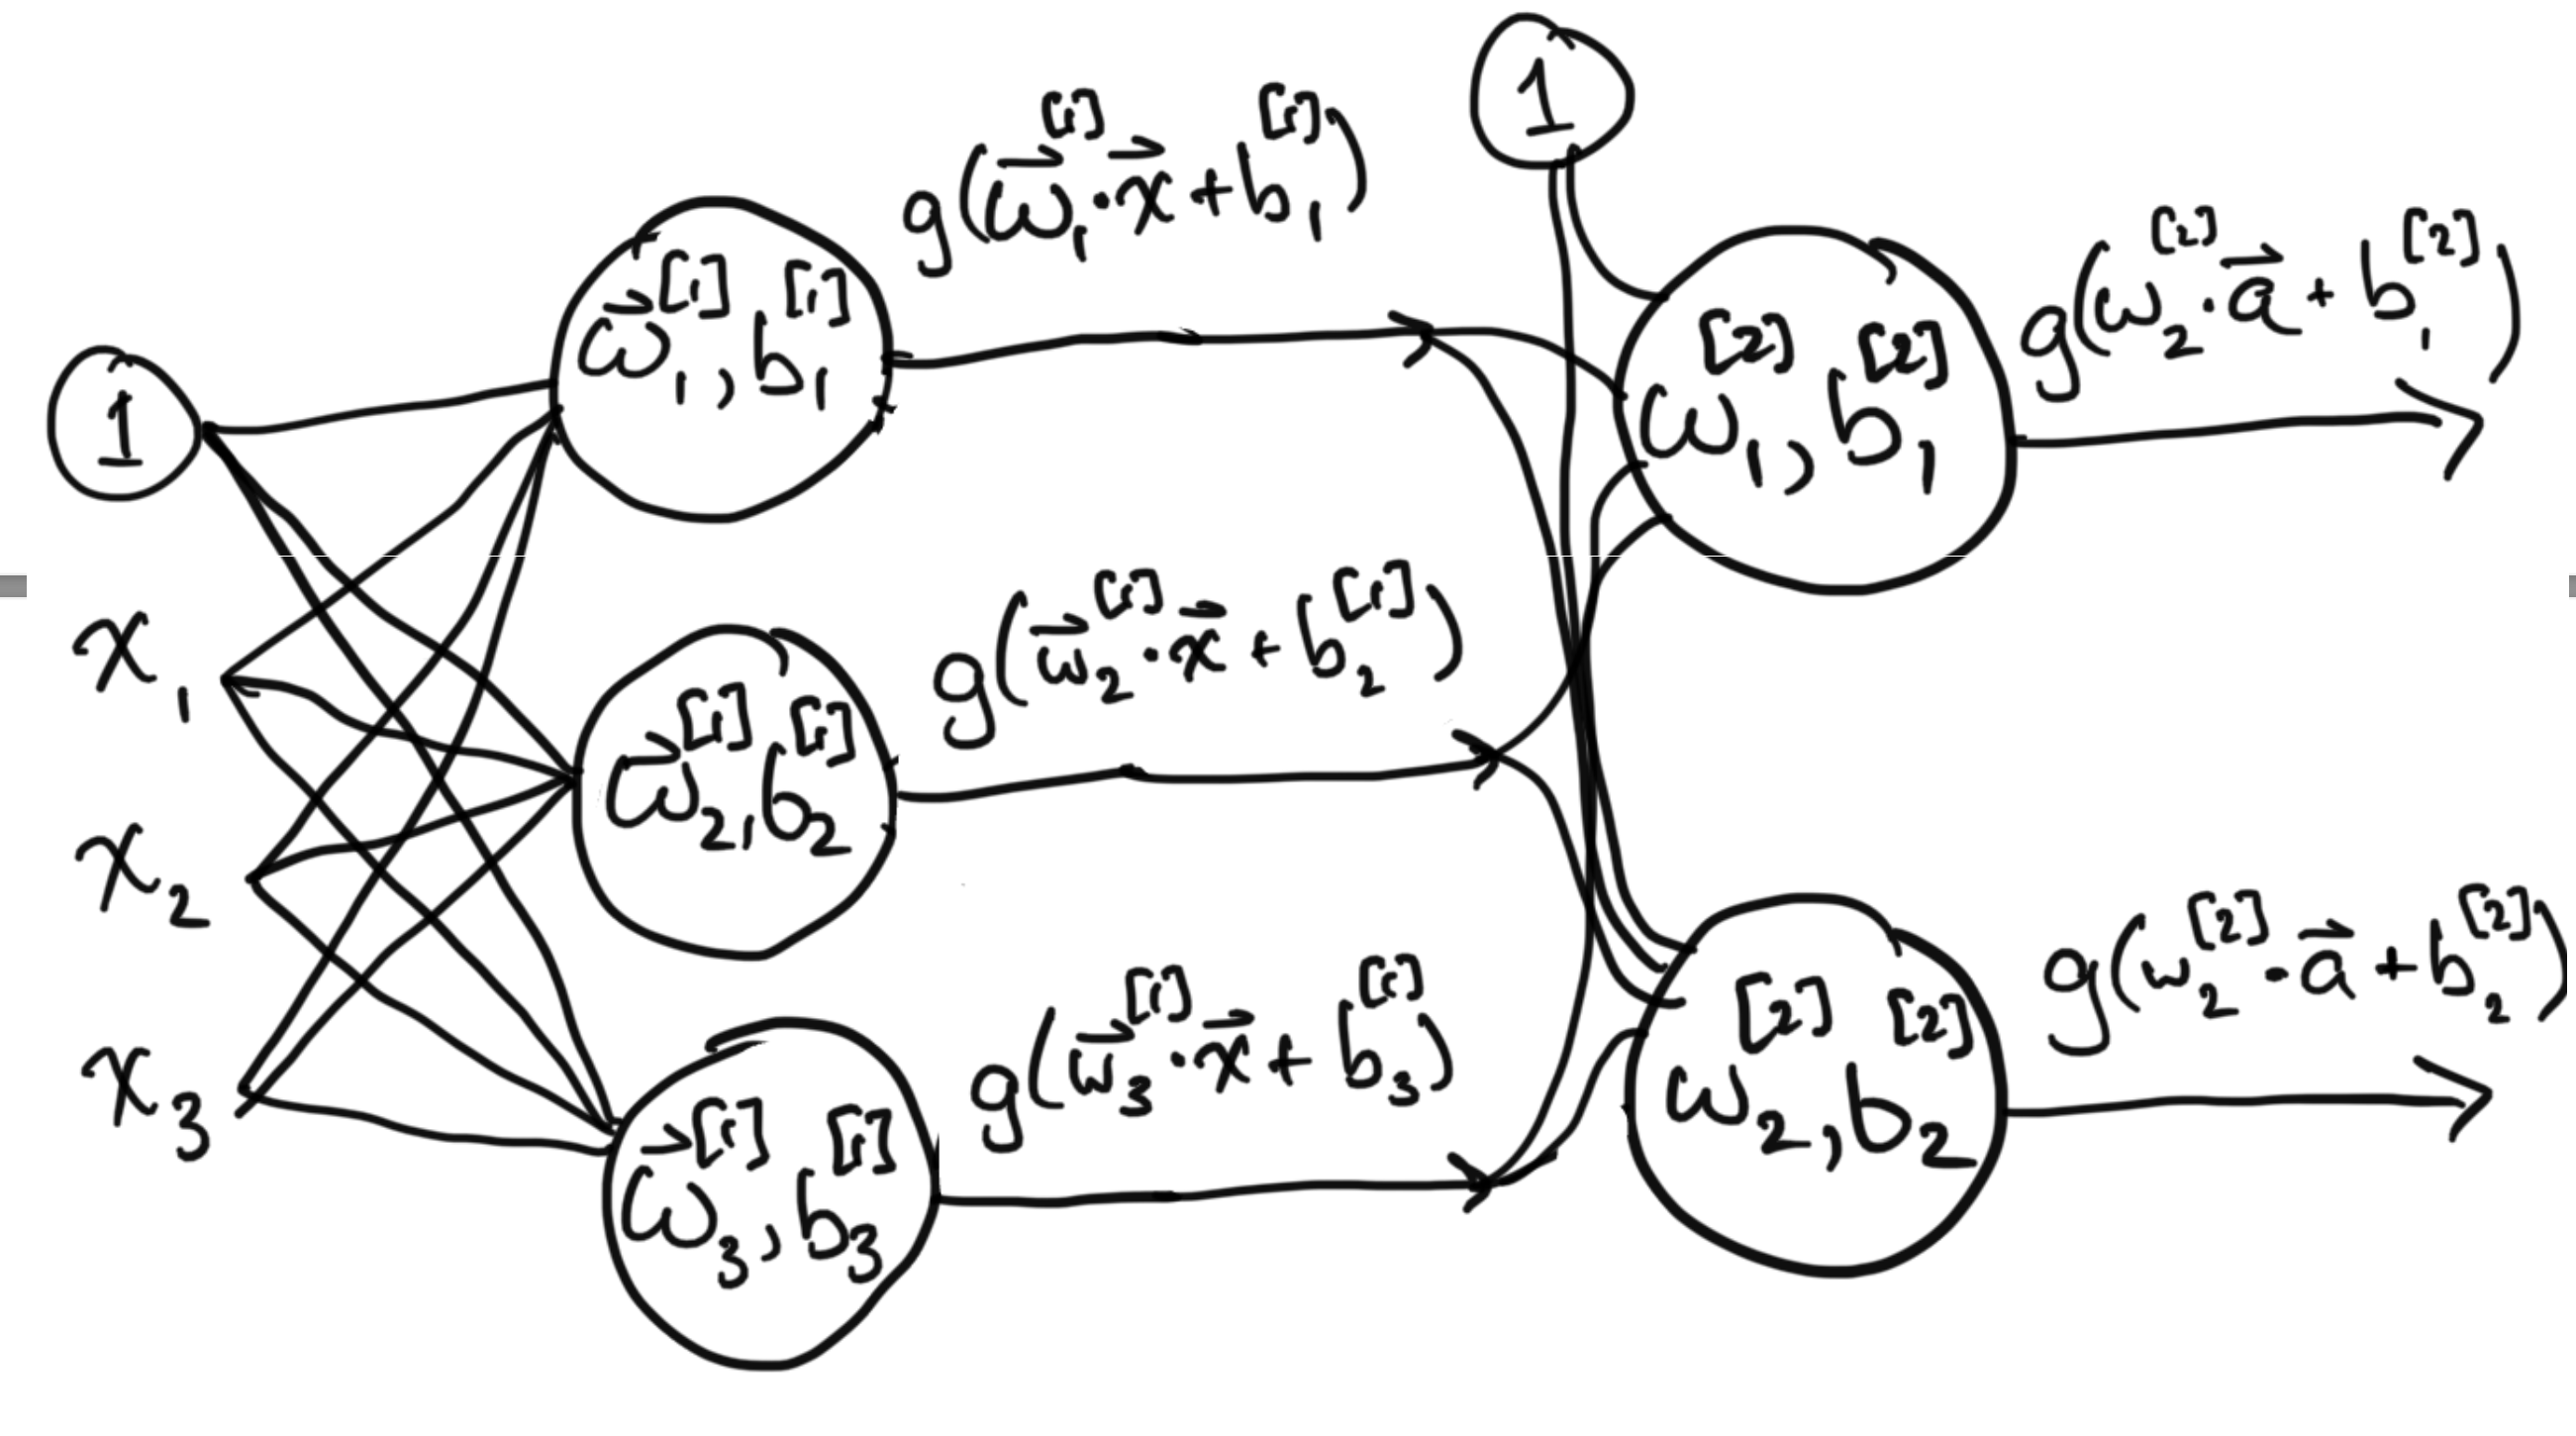

Or, simplified:

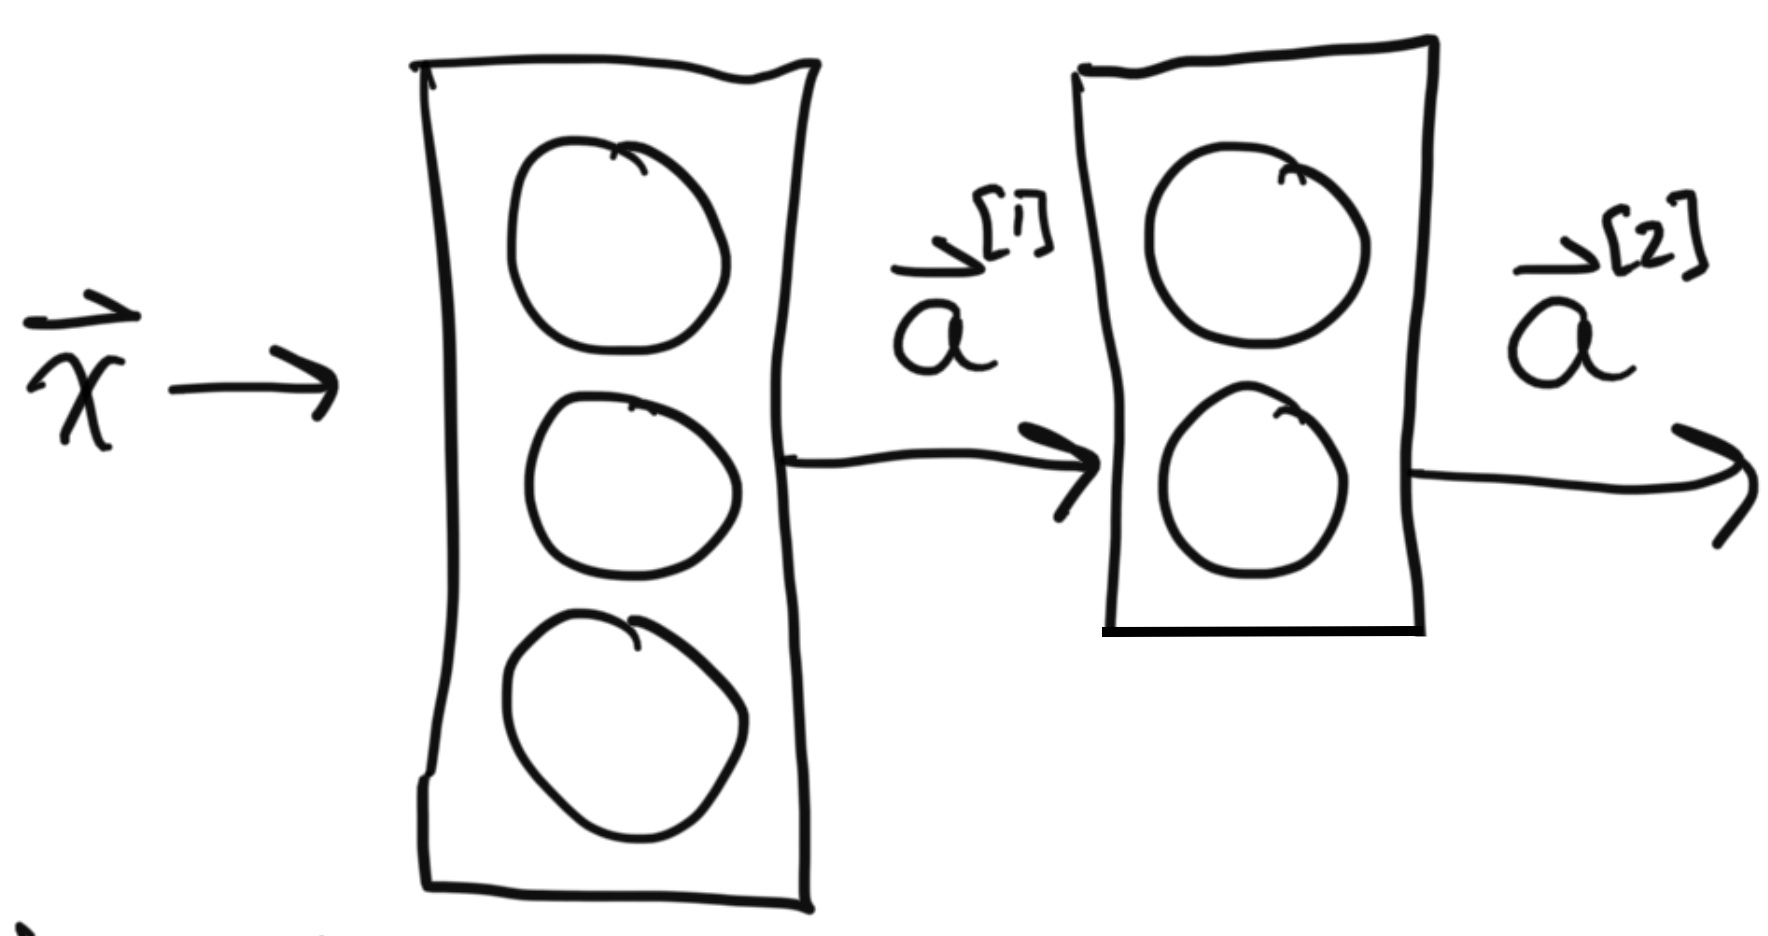

## General formula




$$a_j^{[\ell]} = g \left( 
\boldsymbol{a}^{[\ell-1]} \cdot \boldsymbol{w}_j^{[\ell]} + b_j^{[\ell]} \right)$$

Normally, we denote an input to our model as $\boldsymbol x$.  To use the formula
above at all layers of the neural network, we will sometimes use $\boldsymbol a^{[0]}$
in place of $\boldsymbol x$.

We can apply the formula above for every layer $\ell$ and every neuron $j$ within each
layer.  

## Making predictions
Remember, of course, that we want to use neural networks, like any 
machine learning model, to make predictions about data.  In linear and
logistic regression, we defined our models as functions $f$.  In neural networks, it's a little bit more complicated to do this with a single function
since we have multiple layers of neurons, each computing its own values, but
we can certainly do it!

For a neural network with its output layer being called layer $L$, 
we define $f(x) = \boldsymbol{a}^{[L]}$, in other words, the output of the model
is just the output of the output layer.

Of course, we compute that vector $\boldsymbol{a}^{[L]}$ iteratively, by 
starting with the input layer $\boldsymbol{a}^{[0]}=\boldsymbol{x}$, and 
moving forward through the layers until we reach the output layer, computing
each layer of numbers along the way.  For this reason, this is called 
the **forward propogation** algorithm.



## Vectorization

We now have a sequence of weight **matrices**: $\boldsymbol W^{[1]}$, $\boldsymbol W^{[2]}$, etc, one for each layer of the network.

We similarly have a sequence of bias vectors: $\boldsymbol b^{[1]}$, $\boldsymbol b^{[2]}$, etc. 

Then we can calculate the $z$ and $a$ vectors as:

$$\boldsymbol z^{[\ell]} = \boldsymbol a^{[\ell-1]} \boldsymbol W^{[\ell]} + \boldsymbol b^{[\ell]}$$

$$\boldsymbol a^{[\ell]} = g(\boldsymbol z^{[\ell]}) = g(\boldsymbol a^{[\ell-1]} \boldsymbol W^{[\ell]} + \boldsymbol b^{[\ell]})$$

And with matrices for everything:

Define $\boldsymbol Z^{[\ell]}=\boldsymbol A^{[\ell-1]} \boldsymbol W^{[\ell]} + \boldsymbol b^{[\ell]}$

Define $\boldsymbol A^{[\ell]} = g(\boldsymbol Z^{[\ell]})$ (apply the activation function across
each row of $\boldsymbol Z^{[\ell]}$)